In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
import tensorflow as tf
import pandas as pd

2024-11-04 13:56:02.051148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 13:56:02.277645: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-04 13:56:03.144899: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/tfNetV2/lib/
2024-11-04 13:56:03.144960: W tensorflow/co

In [2]:
## set gpu
gpu = 0
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu}" 
physical_devices = tf.config.list_physical_devices('GPU') 
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


## Load datatest

In [3]:
TESTdf = pd.read_csv("/home/kannika/codes_AI/CSV/DATATEST-V2_mini_ImageNet_MachineUnlearn.csv", dtype=str)
print(TESTdf.shape)
TESTdf.head()

(6000, 7)


,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset
0,0,n0444325700001113,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
1,1,n0444325700000041,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
2,2,n0444325700000976,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
3,3,n0444325700000294,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
4,4,n0444325700000506,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test


In [4]:
#TESTdf01 = TESTdf.sample(100, replace=False)
TESTdf01 = TESTdf.iloc[:2000,:]
TESTdf01 = TESTdf01.reset_index(drop=True)
print(TESTdf01.shape)
TESTdf01.tail()

(2000, 7)


,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset
1995,1995,n0213844100001199,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1996,1996,n0213844100000746,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1997,1997,n0213844100000842,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1998,1998,n0213844100000232,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1999,1999,n0213844100000277,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test


In [17]:
TESTdf02 = TESTdf.iloc[2000:4000,:]
TESTdf02 = TESTdf02.reset_index(drop=True)
print(TESTdf02.shape)
TESTdf02

(2000, 7)


,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset
0,2000,n0213844100000648,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1,2001,n0213844100000166,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
2,2002,n0213844100000995,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
3,2003,n0213844100000852,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
4,2004,n0213844100001017,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
...,...,...,...,...,...,...,...
1995,3995,n0758411000000539,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1996,3996,n0758411000000035,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1997,3997,n0758411000001015,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1998,3998,n0758411000000131,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test


In [4]:
TESTdf03 = TESTdf.iloc[4000:,:]
TESTdf03 = TESTdf03.reset_index(drop=True)
print(TESTdf03.shape)
TESTdf03

(2000, 7)


,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset
0,4000,n0758411000001134,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
1,4001,n0758411000000741,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
2,4002,n0758411000000327,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
3,4003,n0758411000001197,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test
4,4004,n0758411000000150,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
...,...,...,...,...,...,...,...
1995,5995,n0444325700000026,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
1996,5996,n0444325700000332,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
1997,5997,n0444325700000705,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test
1998,5998,n0444325700000354,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test


### Prepare Batch Test

In [5]:
from tensorflow.keras.preprocessing import image

def TENSOR_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.

    return x

In [6]:
height = width = 456

In [7]:
def preparebatch(TESTdf):
    listimg_test = []
    for j in range(len(TESTdf)):
        pathimgmain = TESTdf["img_path_main"][j]
        x_main = TENSOR_image(pathimgmain)
        pathimg2 = TESTdf["img_path_2"][j]
        x_2 = TENSOR_image(pathimg2)
        img_test = [x_main, x_2]
        listimg_test.append(img_test)
        
    return listimg_test

In [23]:
listimg_test01=preparebatch(TESTdf01)
print(len(listimg_test01))

2000


In [24]:
listimg_test02=preparebatch(TESTdf02)
print(len(listimg_test02))

2000


In [8]:
listimg_test03=preparebatch(TESTdf03)
print(len(listimg_test03))

2000


In [ ]:
print(len(listimg_test01)+len(listimg_test02)+len(listimg_test03))

## Load model

In [9]:
model_dir = '/media/HDD/mini-ImageNet/EffNetB5Model_unlearn/R2/unfreezeB4-B7/on_epoch_end/modelEffNetB5_Unlearning_unfreezeB4-B7_R2_epoch50.h5'
print(f"Load Model: {model_dir}")
model = load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)

Load Model: /media/HDD/mini-ImageNet/EffNetB5Model_unlearn/R2/unfreezeB4-B7/on_epoch_end/modelEffNetB5_Unlearning_unfreezeB4-B7_R2_epoch50.h5


2024-11-04 13:57:18.774338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-04 13:57:19.643972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9621 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:17:00.0, compute capability: 7.5


(None, 456, 456, 3) (None, 456, 456, 3)


In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 456, 456, 3  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 456, 456, 6)  0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']            

In [11]:
model.input_shape[0][1]

456

### 💡Predict

In [12]:
def predicted(listimg_test):
    pred_list = list()
    prob_list = list()

    for i in range(0, len(listimg_test)):
        predict = model.predict(listimg_test[i]) 
        predict0 = predict[0][0]
        prob_list.append(predict0)
        if predict0 > 0.5:
            pred_list.append("TRUE")
        else:
            pred_list.append("FALSE")
            
    return pred_list, prob_list

In [14]:
pred_list01, prob_list01 = predicted(listimg_test01)
print(len(pred_list01))
print(len(prob_list01))

In [26]:
pred_list02, prob_list02 = predicted(listimg_test02)
print(len(pred_list02))
print(len(prob_list02))

1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 50ms/step
2000
2000


In [15]:
pred_list03, prob_list03 = predicted(listimg_test03)
print(len(pred_list03))
print(len(prob_list03))

2024-11-04 13:58:14.955290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2024-11-04 13:58:15.850692: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-04 13:58:15.851591: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-04 13:58:15.851606: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2024-11-04 13:58:15.852471: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-04 13:58:15.852511: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 33ms/step
2000
2000


In [14]:
print(len(pred_list01))
print(len(prob_list01))

2000
2000


In [27]:
print(len(pred_list02))
print(len(prob_list02))

2000
2000


In [16]:
print(len(pred_list03))
print(len(prob_list03))

2000
2000


In [17]:
#print(pred_list01)

In [15]:
TESTdf01['category'] = pred_list01
TESTdf01['Prob'] = prob_list01
TESTdf01.head()

,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,0,n0444325700001113,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.808917
1,1,n0444325700000041,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.630092
2,2,n0444325700000976,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,FALSE,0.351478
3,3,n0444325700000294,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.759032
4,4,n0444325700000506,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.773582


In [28]:
TESTdf02['category'] = pred_list02
TESTdf02['Prob'] = prob_list02
TESTdf02.head()

,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,2000,n0213844100000648,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.464051
1,2001,n0213844100000166,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.206977
2,2002,n0213844100000995,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.178648
3,2003,n0213844100000852,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.241409
4,2004,n0213844100001017,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.126191


In [17]:
TESTdf03['category'] = pred_list03
TESTdf03['Prob'] = prob_list03
TESTdf03.head()

,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,4000,n0758411000001134,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.197702
1,4001,n0758411000000741,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.133526
2,4002,n0758411000000327,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.221181
3,4003,n0758411000001197,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.373309
4,4004,n0758411000000150,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.694787


In [16]:
TESTdf01.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn_unfreezeB4-B7_R2_TEST01.csv")

In [29]:
TESTdf02.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4-B7_R2_TEST02.csv")

In [18]:
TESTdf03.to_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4-B7_R2_TEST03.csv")

------------

In [19]:
TESTdf01 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn_unfreezeB4-B7_R2_TEST01.csv", dtype=str)
print(TESTdf01.shape)
TESTdf01.head()

(2000, 10)


,Unnamed: 0.1,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,0,0,n0444325700001113,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.80891734
1,1,1,n0444325700000041,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.6300924
2,2,2,n0444325700000976,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,FALSE,0.35147825
3,3,3,n0444325700000294,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.7590324
4,4,4,n0444325700000506,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.77358246


In [20]:
TESTdf02 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4-B7_R2_TEST02.csv", dtype=str)
print(TESTdf02.shape)
TESTdf02.head()

(2000, 10)


,Unnamed: 0.1,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,0,2000,n0213844100000648,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.4640512
1,1,2001,n0213844100000166,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.20697655
2,2,2002,n0213844100000995,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.17864795
3,3,2003,n0213844100000852,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.24140857
4,4,2004,n0213844100001017,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.12619114


In [21]:
TESTdf03 = pd.read_csv("/home/kannika/codes_AI/CSV/predict_mini-ImageNet_MachineUnlearn__unfreezeB4-B7_R2_TEST03.csv", dtype=str)
print(TESTdf03.shape)
TESTdf03.head()

(2000, 10)


,Unnamed: 0.1,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,0,4000,n0758411000001134,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.19770226
1,1,4001,n0758411000000741,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.13352597
2,2,4002,n0758411000000327,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.22118142
3,3,4003,n0758411000001197,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,FALSE,0,test,FALSE,0.37330875
4,4,4004,n0758411000000150,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.69478685


In [22]:
df_TEST = pd.concat([TESTdf01, TESTdf02, TESTdf03])
print(df_TEST.shape)
df_TEST.head()

(6000, 10)


,Unnamed: 0.1,Unnamed: 0,filename,img_path_main,img_path_2,cls,encode_label,subset,category,Prob
0,0,0,n0444325700001113,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.80891734
1,1,1,n0444325700000041,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.6300924
2,2,2,n0444325700000976,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,FALSE,0.35147825
3,3,3,n0444325700000294,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.7590324
4,4,4,n0444325700000506,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,/media/HDD/mini-ImageNet/mini-imagenet-DATATES...,TRUE,1,test,TRUE,0.77358246


In [23]:
set(df_TEST["category"])

{'FALSE', 'TRUE'}

In [24]:
df_TEST.to_csv("/home/kannika/codes_AI/CSV/predictEffNetR1_mini-ImageNet_MachineUnlearn_unfreezeB4-B7_R2_TEST.csv")

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = df_TEST['cls'].array
pred = df_TEST['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))  #performance

classifier accuracy = 90.6%
              precision    recall  f1-score   support

       FALSE       0.88      0.93      0.91      3000
        TRUE       0.93      0.88      0.90      3000

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



### Confusion matrix

Text(0.5, 21.249999999999993, 'Predicted label')

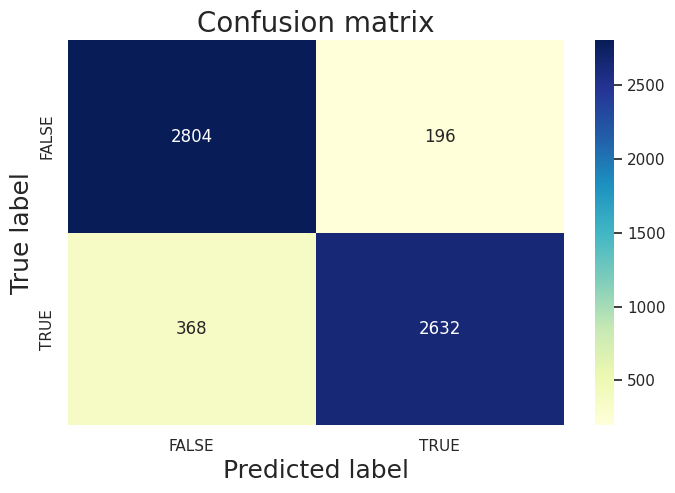

In [26]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [27]:
tn, fp, fn, tp = confusion_matrix(act, pred).ravel()
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)
print("True Positive: (TP)", tp)

True Negative (TN): 2804
False Positive (FP): 196
False Negative (FN): 368
True Positive: (TP) 2632
